In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/BMSO603 Final Project/ObesityDataSet.csv')
#df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Data Preprocessing

# Ensure clean column names
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Unique row values
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'Gender':
['Female' 'Male']
------------------------------
Unique values in 'family_history_with_overweight':
['yes' 'no']
------------------------------
Unique values in 'FAVC':
['no' 'yes']
------------------------------
Unique values in 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']
------------------------------
Unique values in 'SMOKE':
['no' 'yes']
------------------------------
Unique values in 'SCC':
['no' 'yes']
------------------------------
Unique values in 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']
------------------------------
Unique values in 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
------------------------------
Unique values in 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
------------------------------


In [ ]:
# Descriptive statistics on dataframe
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Create table to see how balanced dataset is
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


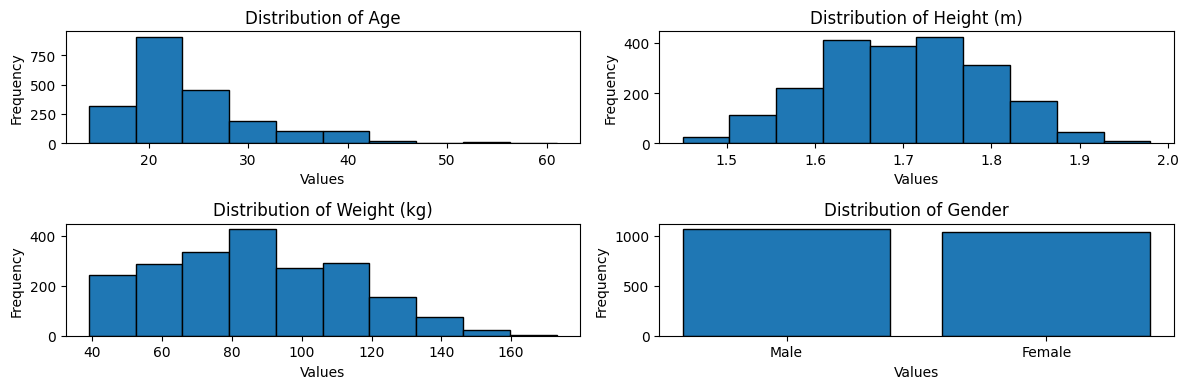

In [ ]:
# Distribution of physical attributes
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
axes = axes.ravel()

# Age
axes[0].hist(df['Age'], edgecolor='black')
axes[0].set_title('Distribution of Age')

# Height
axes[1].hist(df['Height'], edgecolor='black')
axes[1].set_title('Distribution of Height (m)')

# Weight
axes[2].hist(df['Weight'], edgecolor='black')
axes[2].set_title('Distribution of Weight (kg)')

# Gender
gender_count = df['Gender'].value_counts()
axes[3].bar(gender_count.index, gender_count.values, edgecolor='black')
axes[3].set_title('Distribution of Gender')

# Adding labels and title
for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

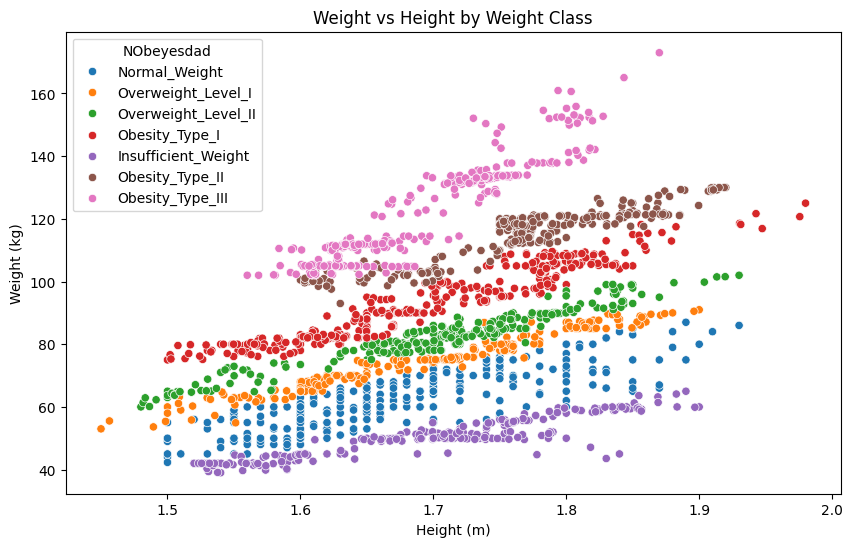

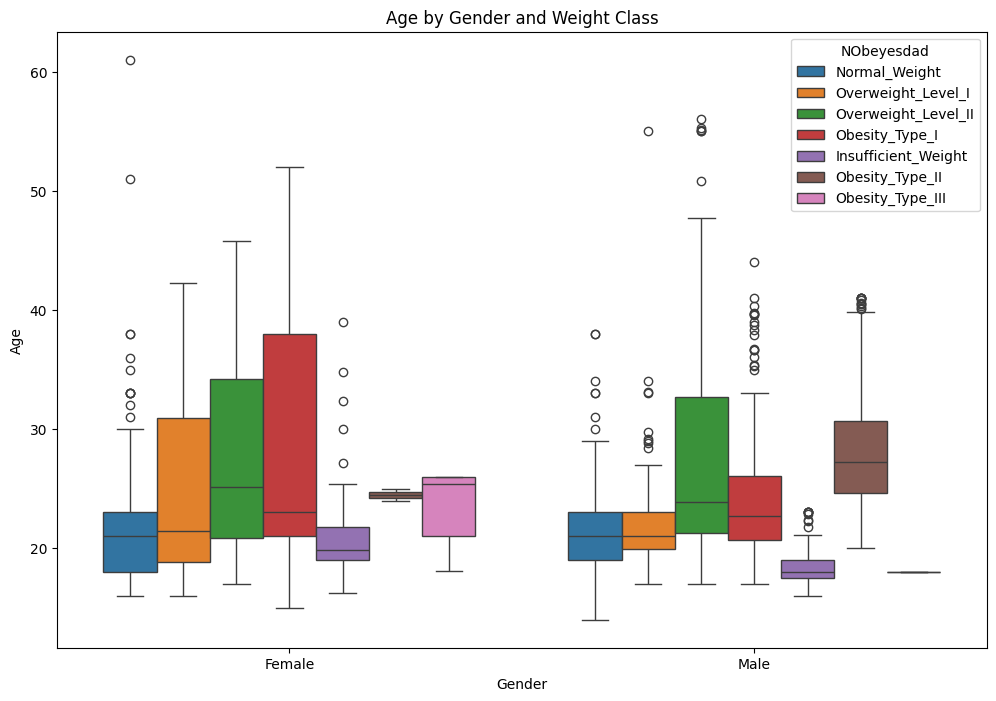

In [ ]:
# Visualize physical attributes (age, height, weight, gender) by class
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad')
plt.title('Weight vs Height by Weight Class')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Gender', y='Age', hue='NObeyesdad')
plt.title('Age by Gender and Weight Class')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

### QUESTION 1: WHAT PHYSICAL ATTRIBUTES ARE AT A HIGHER RISK OF OBESITY?

In [ ]:
# Target Variable
target = "NObeyesdad"

# Set X and y
#X = df.drop(target, axis=1)
X = df[['Age', 'Height', 'Weight', 'Gender', 'family_history_with_overweight']]
y = df[target]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=457)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MODEL 1 (Base Model) — Multinomial Logistic Regression
log_model = LogisticRegression(multi_class="multinomial", max_iter=5000)
log_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial')

In [ ]:
# intercepts
log_model.intercept_

array([-5.96042821,  0.16805767,  3.36238428, -1.48857252, -2.02282143,
        2.69611423,  3.24526597])

In [ ]:
# coefficients
log_model.coef_

array([[-7.13560723e-01,  3.50789161e+00, -1.21912794e+01,
        -1.21097315e-01, -5.18315835e-01],
       [-1.87611684e-01,  1.88687699e+00, -7.05331822e+00,
         4.56513079e-01, -4.42135815e-01],
       [ 8.53336697e-02, -1.39864572e+00,  4.05387693e+00,
         8.41210157e-02,  2.60193314e-01],
       [ 8.19883294e-01, -2.97284160e+00,  9.16650144e+00,
         1.96384126e+00,  1.36678299e-01],
       [-3.42900663e-03, -1.93671323e+00,  9.27697399e+00,
        -3.13829891e+00,  6.49876147e-01],
       [-2.23506345e-01,  9.88001337e-01, -2.93671845e+00,
         1.17433289e-01, -3.87675456e-01],
       [ 2.22890796e-01, -7.45693905e-02, -3.16036293e-01,
         6.37487579e-01,  3.01379346e-01]])

Logistic Regression Results: 
Accuracy: 0.899
F1 Score: 0.887
Test set RMSE: 0.709
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        81
           1       0.95      0.73      0.83        85
           2       0.96      0.97      0.97       118
           3       0.99      1.00      1.00       100
           4       1.00      1.00      1.00        94
           5       0.74      0.74      0.74        78
           6       0.75      0.78      0.77        78

    accuracy                           0.90       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.90      0.90      0.90       634



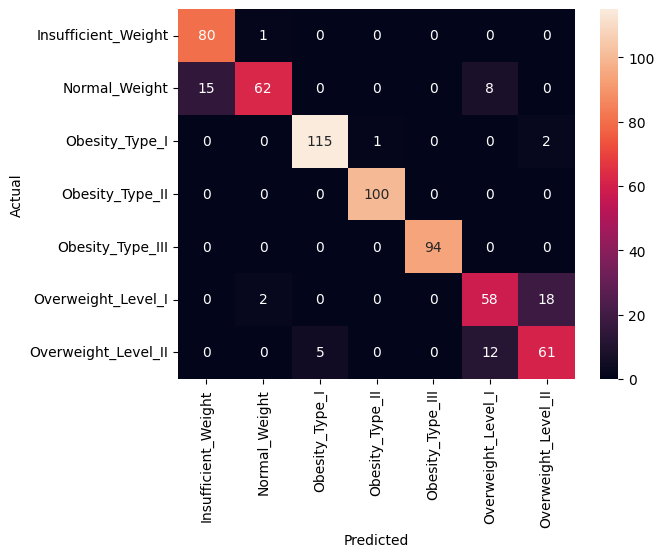

In [ ]:
# Find predictions and probabilities
y_pred_log = log_model.predict(X_test_scaled)
predictions_log = log_model.predict_proba(X_test_scaled)

# model results
print("Logistic Regression Results: ")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_log)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_log, average='macro')))
# evaluate the test set RMSE
rmse_test_log = MSE(y_test, y_pred_log)**(1/2)
print('Test set RMSE: {:.3f}'.format(rmse_test_log))
print(classification_report(y_test, y_pred_log))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# print coefficients and odd ratios for features and classes
classes = le.classes_
features = X.columns
coefs = log_model.coef_
odds = np.exp(coefs)

rows = []
for idx_class, class_name in enumerate(classes):
    for idx_feat, feature in enumerate(features):
        rows.append({
            "Class": class_name,
            "Feature": feature,
            "Coefficient": coefs[idx_class, idx_feat],
            "Odds Ratio": odds[idx_class, idx_feat]
        })

final_df = pd.DataFrame(rows)

# sort
final_df = final_df.sort_values(["Class", "Feature"]).reset_index(drop=True)
display(final_df)

,Class,Feature,Coefficient,Odds Ratio
0,Insufficient_Weight,Age,-0.713561,0.489897
1,Insufficient_Weight,Gender_Male,-0.121097,0.885948
2,Insufficient_Weight,Height,3.507892,33.377820
3,Insufficient_Weight,Weight,-12.191279,0.000005
4,Insufficient_Weight,family_history_with_overweight_yes,-0.518316,0.595523
5,Normal_Weight,Age,-0.187612,0.828937
6,Normal_Weight,Gender_Male,0.456513,1.578560
7,Normal_Weight,Height,1.886877,6.598729
8,Normal_Weight,Weight,-7.053318,0.000865
9,Normal_Weight,family_history_with_overweight_yes,-0.442136,0.642662


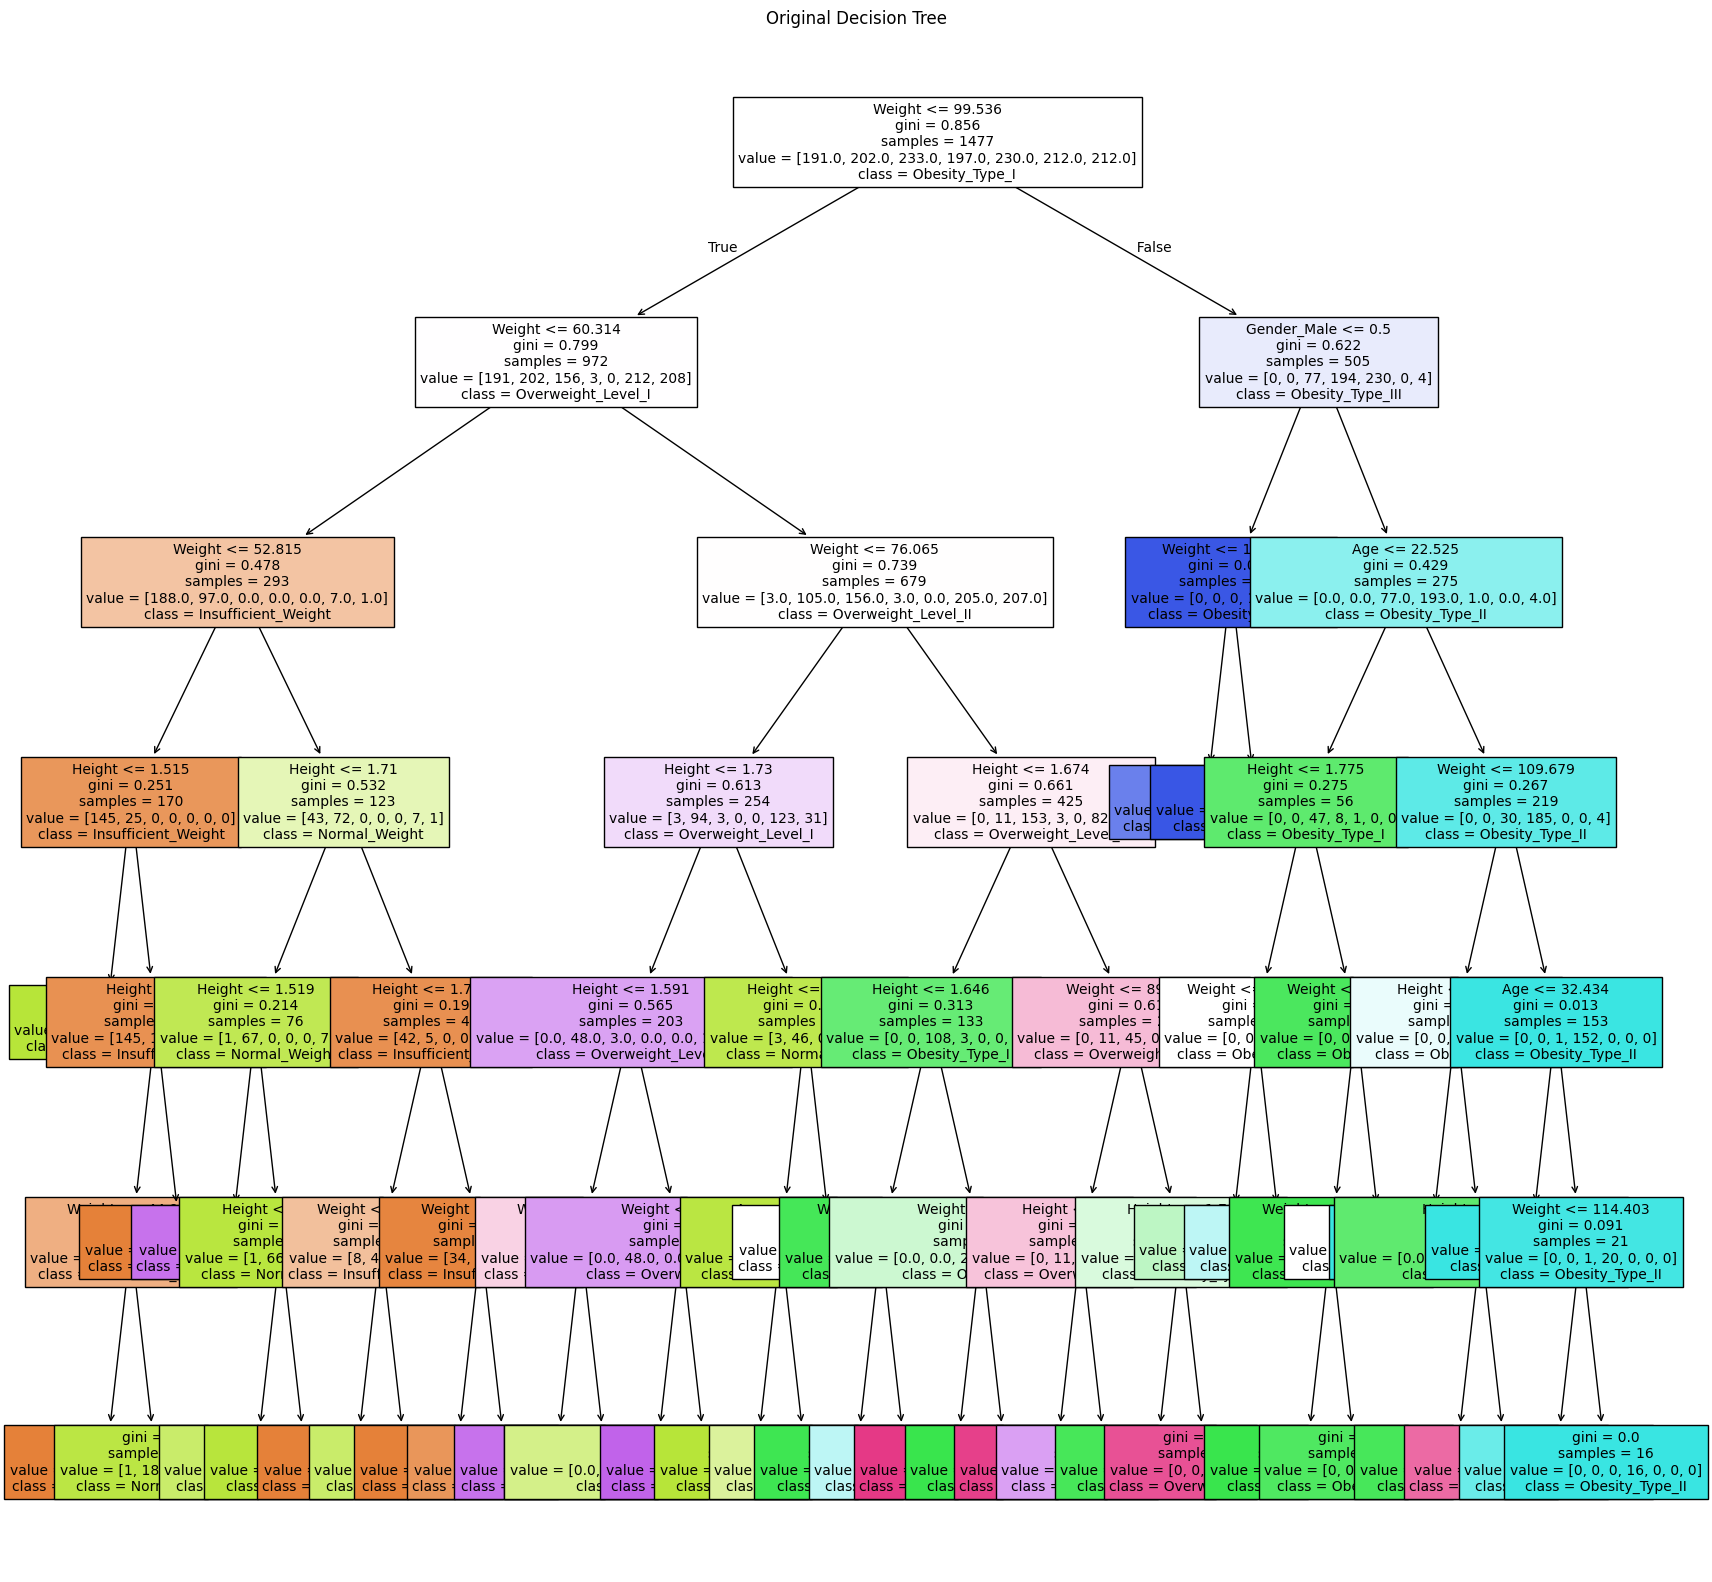

In [ ]:
# MODEL 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# decision tree model
base_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=5,
    random_state=457)
base_model.fit(X_train, y_train)

# plot original tree
plt.figure(figsize=(20,20))
plot_tree(base_model,feature_names=X.columns, filled=True, class_names=le.classes_, fontsize=10)
plt.title('Original Decision Tree')
plt.show()

In [ ]:
# predict test set
y_pred_dt = base_model.predict(X_test)

# evaluate the test set RMSE
rmse_test_dt = MSE(y_test, y_pred_dt)**(1/2)

# print results
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))
print("Accuracy: {:.3f}".format(accuracy_dt))
print('Test set RMSE of dt: {:.3f}'.format(rmse_test_dt))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_dt, average='macro')))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        81
           1       0.85      0.75      0.80        85
           2       0.92      0.94      0.93       118
           3       0.95      0.91      0.93       100
           4       1.00      1.00      1.00        94
           5       0.69      0.81      0.75        78
           6       0.88      0.78      0.83        78

    accuracy                           0.89       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.89      0.89      0.89       634

Accuracy: 0.888
Test set RMSE of dt: 0.825
F1 Score: 0.881


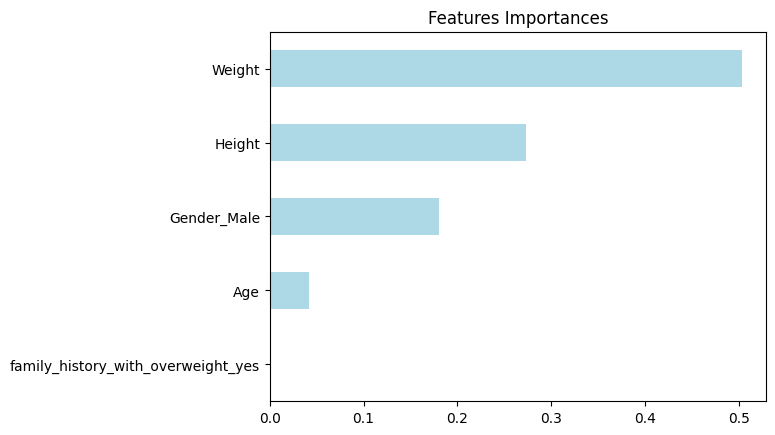

In [ ]:
# feature importance
base_importance = pd.Series(base_model.feature_importances_, index=X_train.columns)

# sort importances
sorted_base_features = base_importance.sort_values()

# make a horizontal bar chart
sorted_base_features.plot(kind='barh', color='lightblue')
plt.title('Features Importances')
plt.show()

In [ ]:
# Post-Pruning (Cost-Complexity Pruning)
clf = DecisionTreeClassifier(random_state=457)
clf.fit(X_train, y_train)

# extract set of ccp alphas
ccp_alphas = base_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]

# GridSearchCV for Hyperparameter Tuning
parameters = {'ccp_alpha': ccp_alphas.tolist()}

# instance
gsearch = GridSearchCV(DecisionTreeClassifier(random_state=457), parameters, cv=10)

# conduct grid search over the parameter space
gsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=457),
             param_grid={'ccp_alpha': [0.0, 0.00010238287894050245,
                                       0.00013098446329558755,
                                       0.00013540961408260027,
                                       0.00015475384466582826,
                                       0.00023257328207744194,
                                       0.0002649318536398727,
                                       0.0007823666591439103,
                                       0.0015460819881520163,
                                       0.0016470411229262657,
                                       0.0018257661035574867,
                                       0.0020027586554918677,
                                       0.002205081223414008,
                                       0.00343037689009253,
                                       0.006162080696583948,
                                       0.009197093654124158,
                                       0.009245699008732181,
                                       0.01084490366537654, 0.01215176343674517,
                                       0.015623522234533841,
                                       0.02061949220357647, 0.02152444492678432,
                                       0.022806332829401324,
                                       0.02445577192631449,
                                       0.029787137981738293,
                                       0.039884997117583226,
                                       0.04413906319013283, 0.09120363657413677,
                                       0.1246974224873838]})

In [ ]:
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

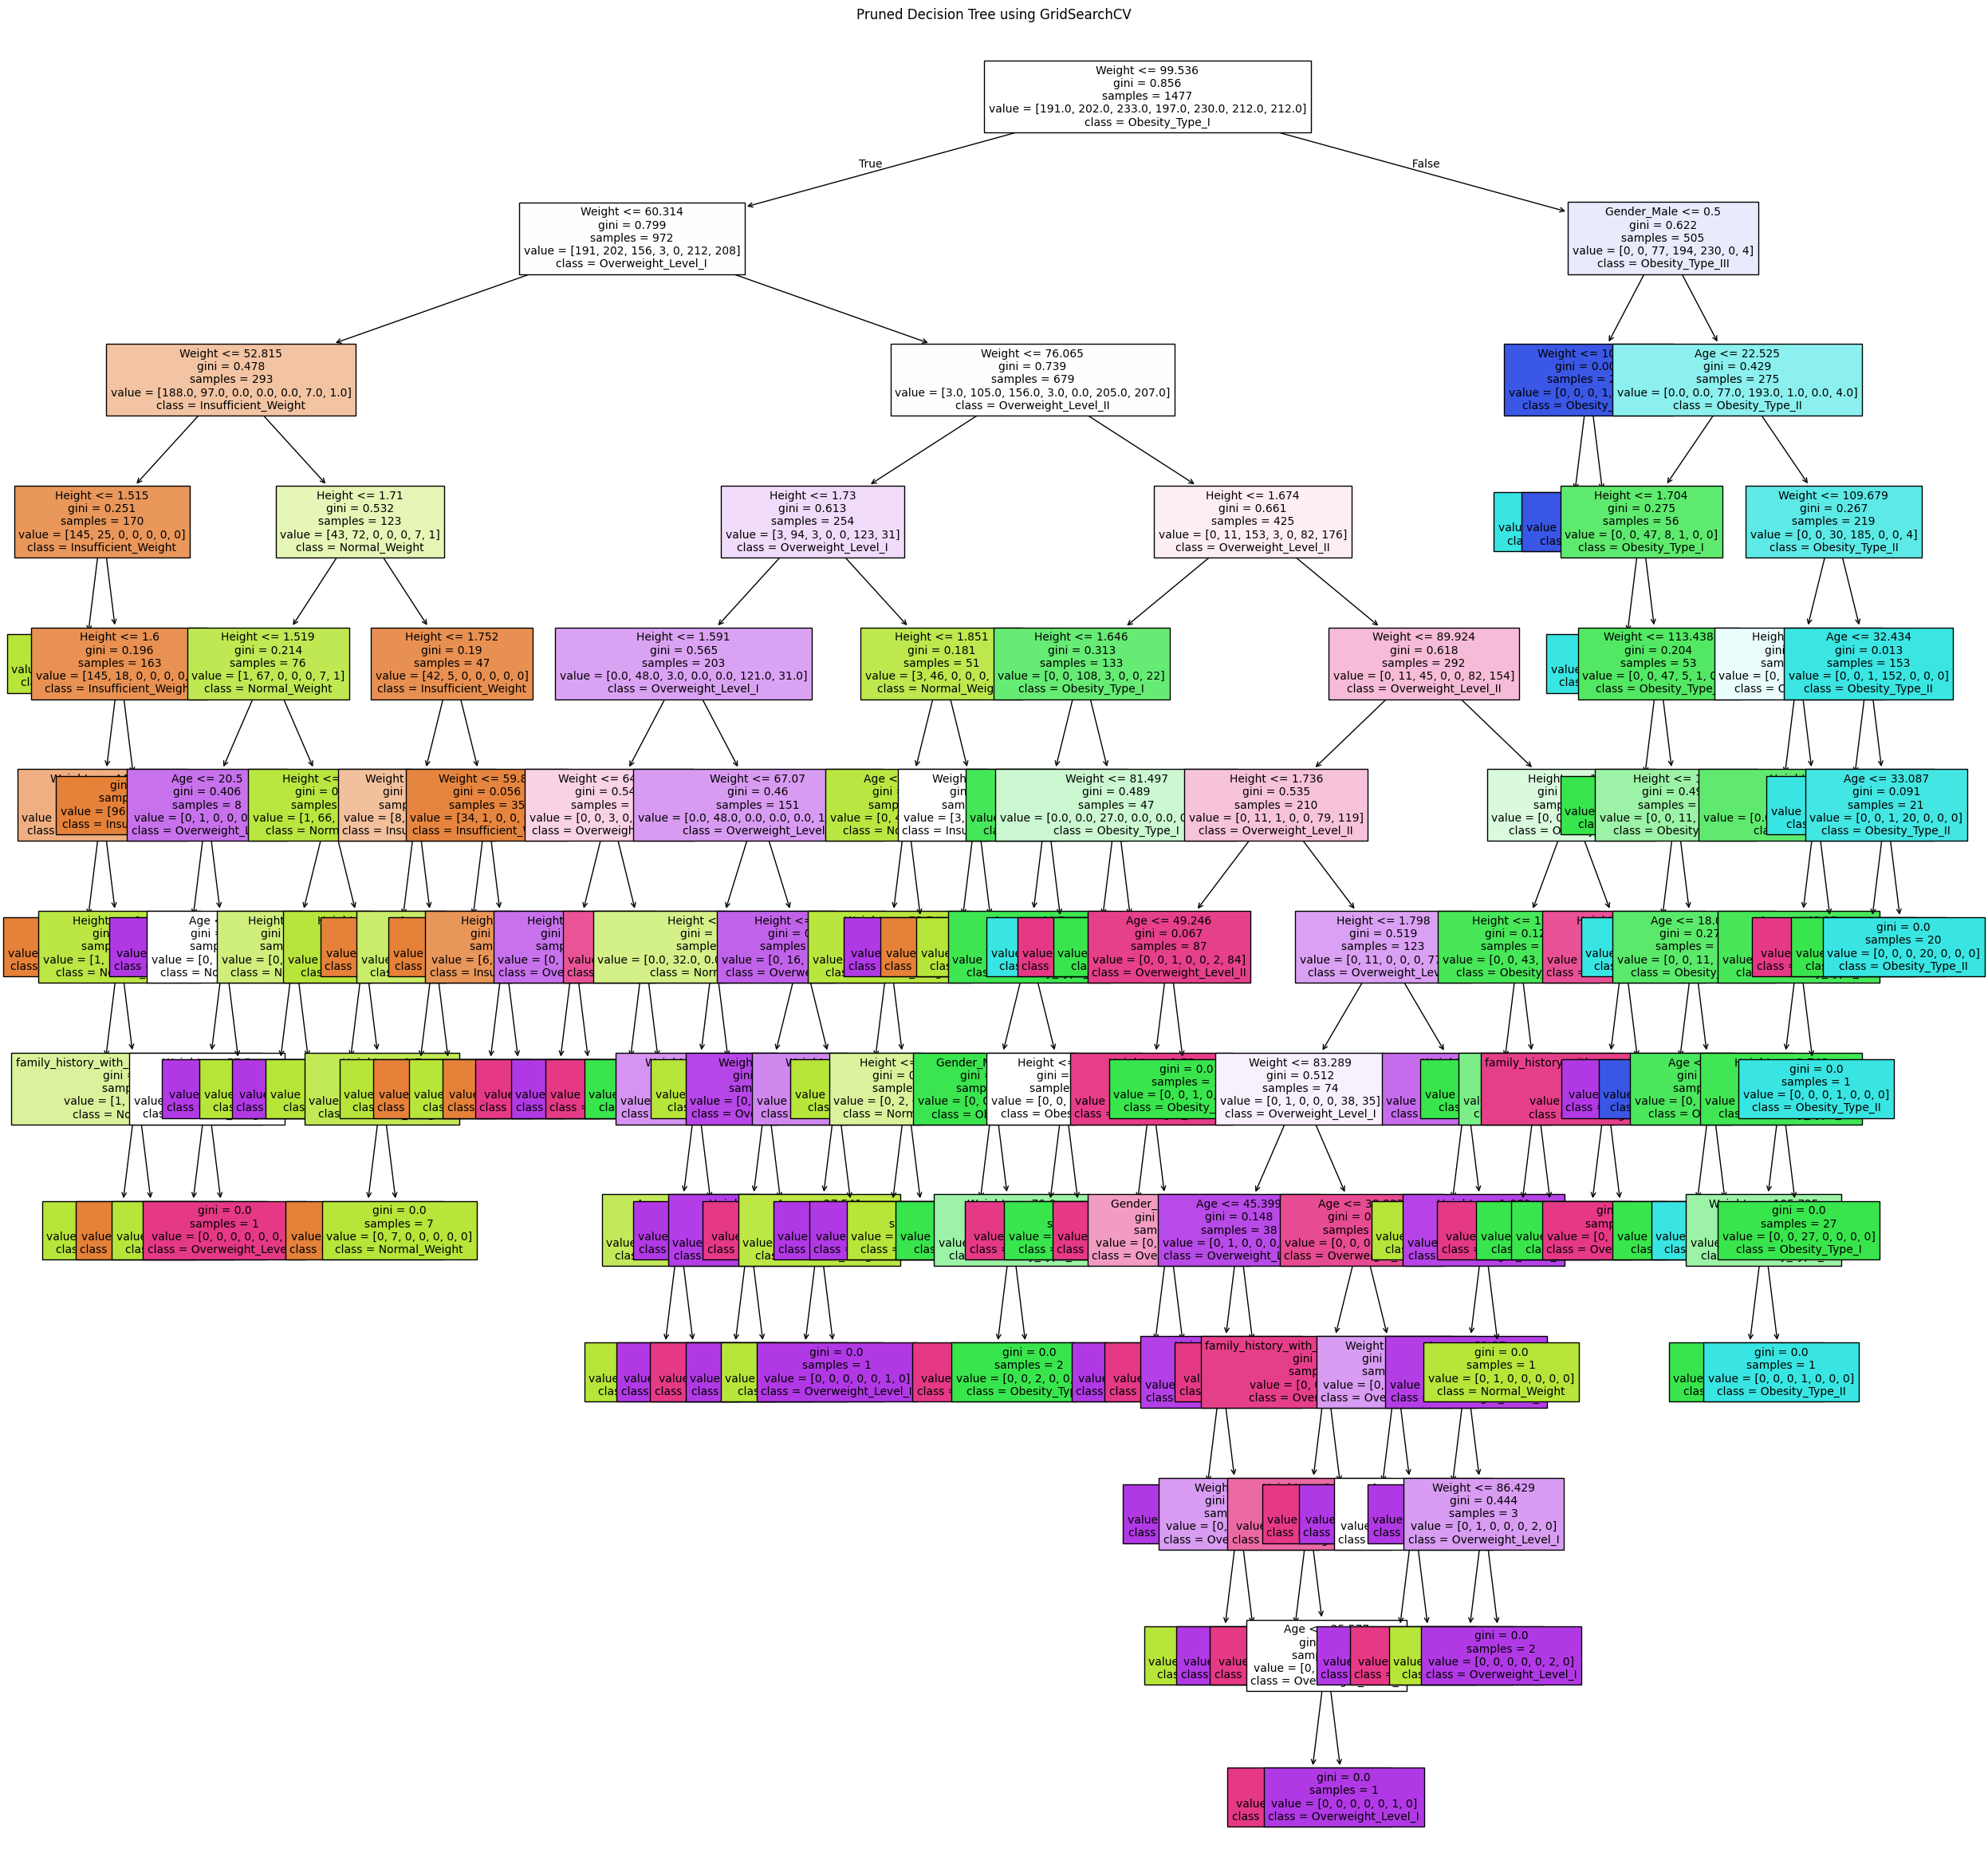

In [ ]:
# extract best classifier
clf = gsearch.best_estimator_

# visualize
plt.figure(figsize=(30,30))
plot_tree(clf,feature_names=X.columns, filled=True, class_names=le.classes_, fontsize=10)
plt.title('Pruned Decision Tree using GridSearchCV')
plt.show()

In [ ]:
# print results
y_pred_post = clf.predict(X_test)
accuracy_post = accuracy_score(y_test, y_pred_post)
rmse_test_post = MSE(y_test, y_pred_post)**(1/2)
print(classification_report(y_test, y_pred_post))
print("Accuracy using post-pruning: {:.3f}".format(accuracy_post))
print('Test set RMSE post-pruning: {:.3f}'.format(rmse_test_post))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_post, average='macro')))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        81
           1       0.96      0.91      0.93        85
           2       0.95      0.99      0.97       118
           3       0.99      0.96      0.97       100
           4       1.00      1.00      1.00        94
           5       0.94      0.94      0.94        78
           6       0.95      0.91      0.93        78

    accuracy                           0.96       634
   macro avg       0.96      0.95      0.95       634
weighted avg       0.96      0.96      0.96       634

Accuracy using post-pruning: 0.957
Test set RMSE post-pruning: 0.337
F1 Score: 0.955


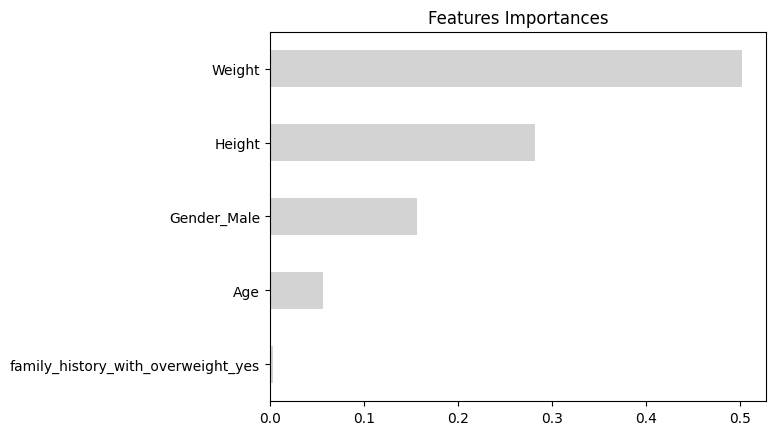

In [ ]:
# feature importances

# create a pd.Series of features importances
importances_post = pd.Series(clf.feature_importances_, index=X_train.columns)

# sort the importances
sorted_importances_post = importances_post.sort_values()

# make a horizontal bar chart
sorted_importances_post.plot(kind='barh', color='lightgrey')
plt.title('Features Importances')
plt.show()

In [ ]:
from sklearn.tree import export_text

# text representation of tree
print(export_text(clf, feature_names=list(X.columns)))

|--- Weight <= 99.54
|   |--- Weight <= 60.31
|   |   |--- Weight <= 52.81
|   |   |   |--- Height <= 1.51
|   |   |   |   |--- class: 1
|   |   |   |--- Height >  1.51
|   |   |   |   |--- Height <= 1.60
|   |   |   |   |   |--- Weight <= 44.96
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Weight >  44.96
|   |   |   |   |   |   |--- Height <= 1.60
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Height >  1.60
|   |   |   |   |   |   |   |--- family_history_with_overweight_yes <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- family_history_with_overweight_yes >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Height >  1.60
|   |   |   |   |   |--- class: 0
|   |   |--- Weight >  52.81
|   |   |   |--- Height <= 1.71
|   |   |   |   |--- Height <= 1.52
|   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- Age >  20.50
|   |   |   |   |   

In [ ]:
# MODEL 3 — Random Forest

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=4,
    random_state=457
)

# fit model
rf_model.fit(X_train, y_train)

# predict the test set labels
y_pred_rf = rf_model.predict(X_test)

# evaluate the test set RMSE
rmse_test_rf = MSE(y_test, y_pred_rf)**(1/2)

print("Random Forest Results:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_rf)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_rf, average='macro')))
print('Test set RMSE of rf: {:.3f}'.format(rmse_test_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.954
F1 Score: 0.951
Test set RMSE of rf: 0.594
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        81
           1       0.88      0.86      0.87        85
           2       0.98      0.98      0.98       118
           3       1.00      0.98      0.99       100
           4       1.00      1.00      1.00        94
           5       0.87      0.96      0.91        78
           6       0.97      0.96      0.97        78

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.96      0.95      0.95       634



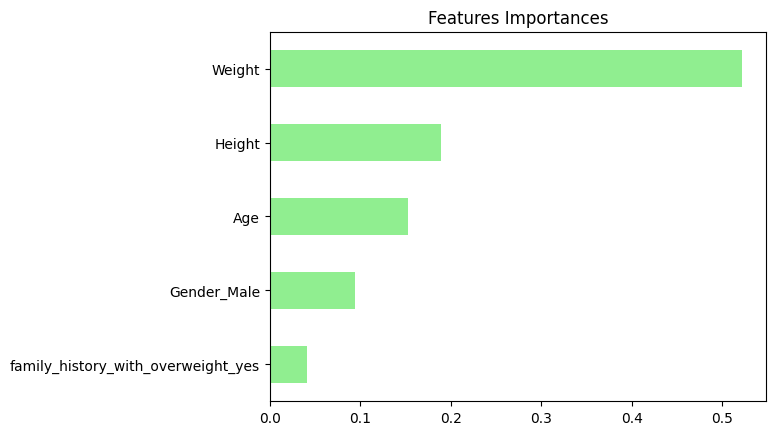

In [ ]:
# feature importances

# create a pd.Series of features importances
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# sort the importances
sorted_importances_rf = importances_rf.sort_values()

# make a horizontal bar chart
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

### QUESTION 2: CAN WE PREDICT OBESITY LEVEL BY A PERSON'S LIFESTYLE AND BEHAVIOR CHOICES?

In [ ]:
# TARGET
target = "NObeyesdad"

# Set X and y
X = df.drop(columns=['NObeyesdad', 'Height', 'Weight', 'Age', 'Gender', 'family_history_with_overweight'])
y = df[target]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=457, stratify=y)

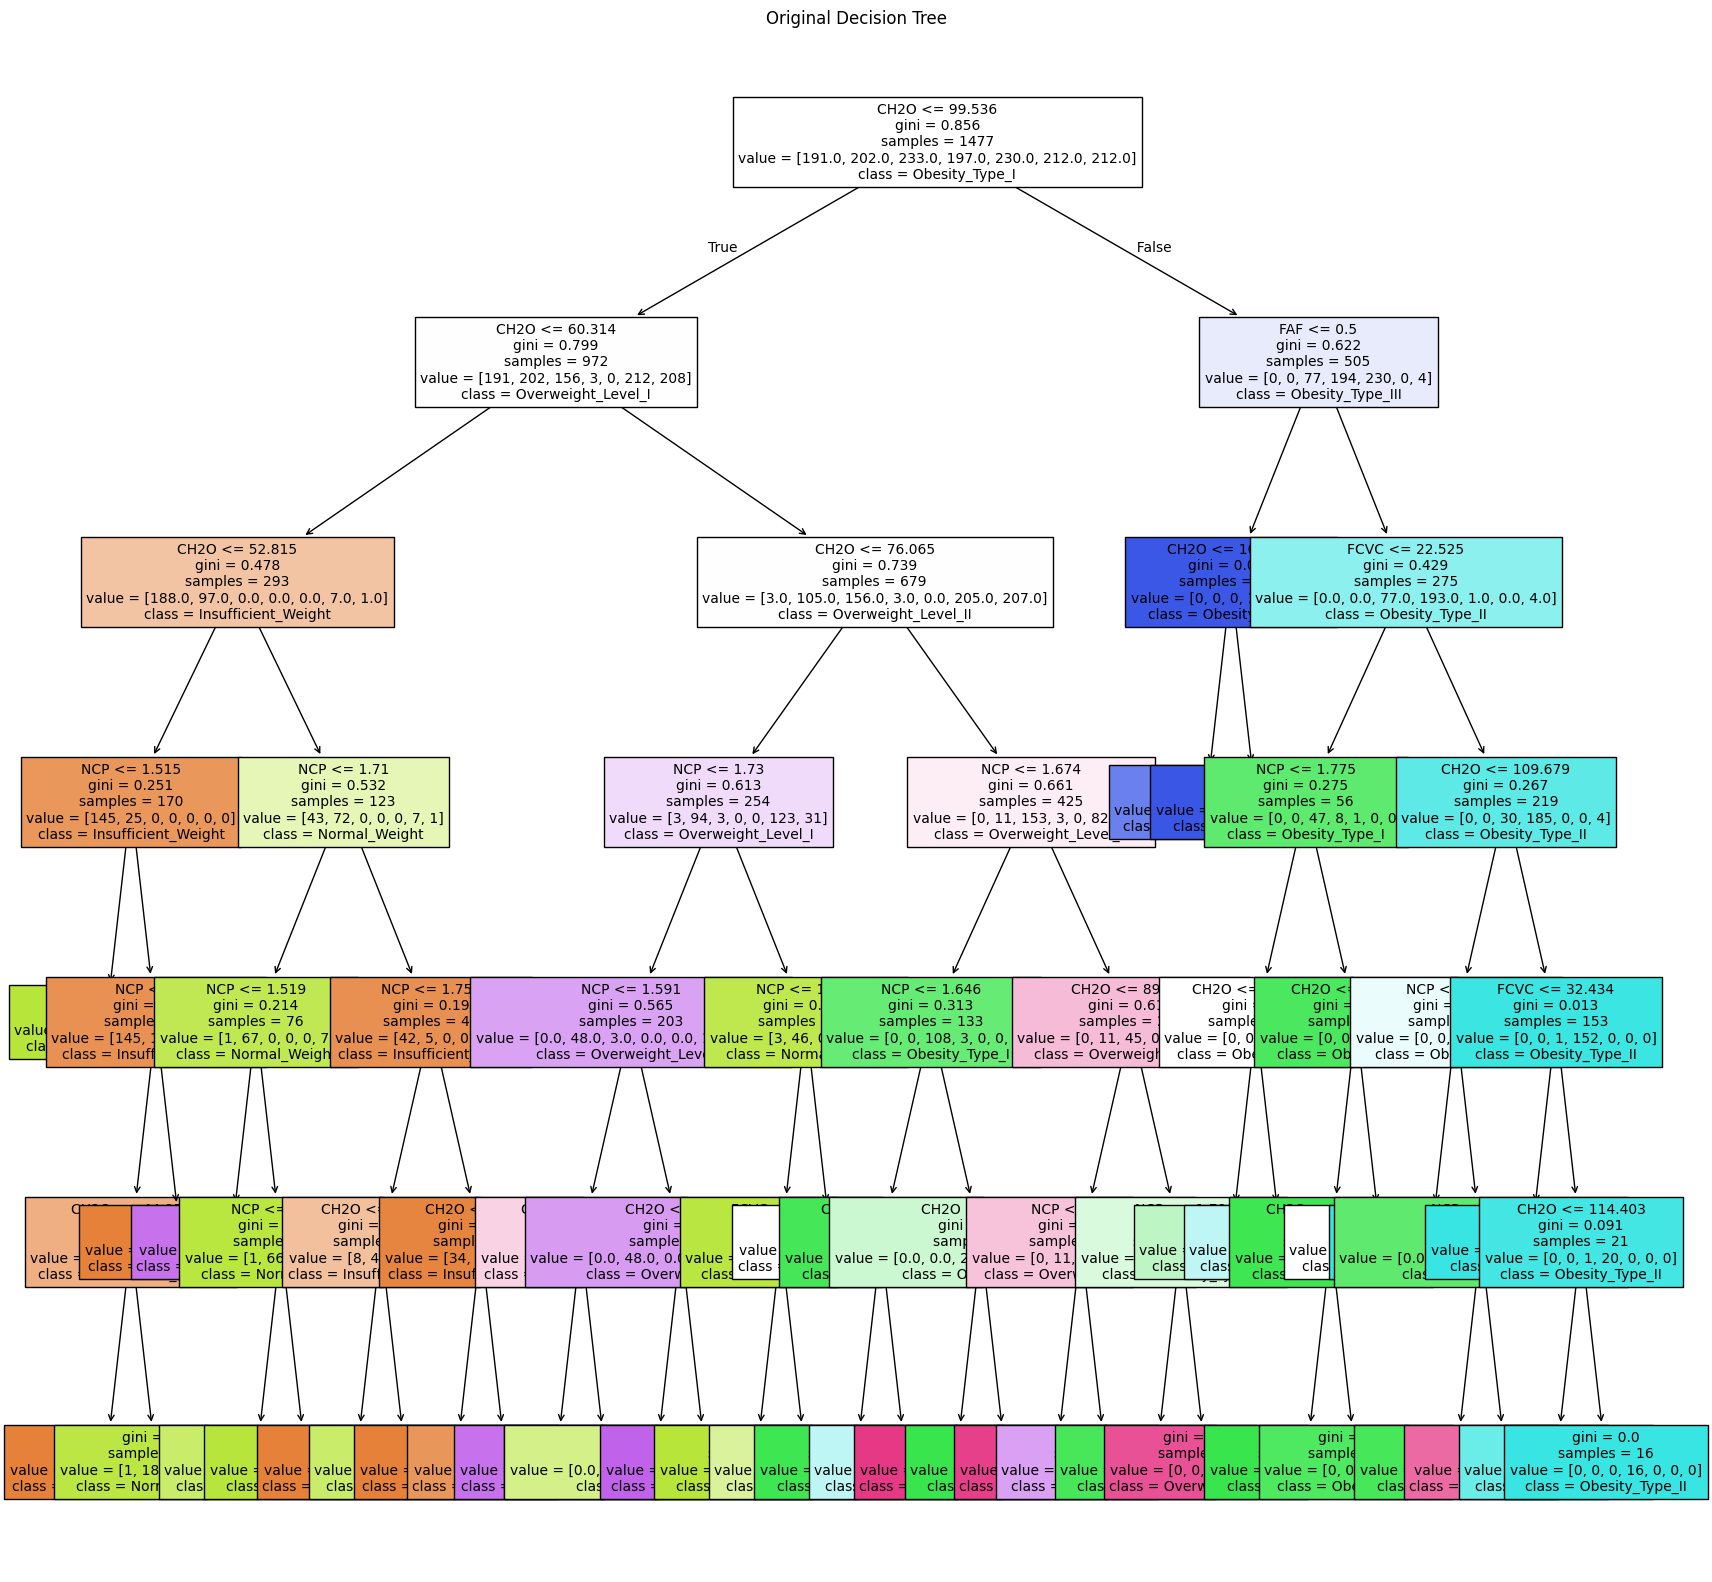

In [ ]:
# MODEL 1 - Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# decision tree model
model_dt = DecisionTreeClassifier(random_state=457)
model_dt.fit(X_train, y_train)

# plot original tree
plt.figure(figsize=(20,20))
plot_tree(base_model,feature_names=X.columns, filled=True, class_names=le.classes_, fontsize=10)
plt.title('Original Decision Tree')
plt.show()

In [ ]:
# predict test set
y_pred_dt = model_dt.predict(X_test)

# evaluate the test set RMSE
rmse_test_dt = MSE(y_test, y_pred_dt)**(1/2)

# print results
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))
print("Accuracy: {:.3f}".format(accuracy_dt))
print('Test set RMSE of dt: {:.3f}'.format(rmse_test_dt))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_dt, average='macro')))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        82
           1       0.57      0.55      0.56        86
           2       0.62      0.65      0.63       106
           3       0.77      0.72      0.74        89
           4       0.99      0.98      0.98        97
           5       0.56      0.55      0.56        87
           6       0.54      0.51      0.52        87

    accuracy                           0.67       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.67      0.67      0.67       634

Accuracy: 0.674
Test set RMSE of dt: 1.990
F1 Score: 0.669


In [ ]:
# Import XGBoost
import xgboost as xgb

# Instantiate the XGBoost Classifier
xgb_r = xgb.XGBClassifier(random_state=457)

# Fit the model to the training data
xgb_r.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_r.predict(X_test)

# Evaluate the test set RMSE
rmse_test_xgb = MSE(y_test, y_pred_xgb)**(1/2)

# print results
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_xgb)))
print('Test set RMSE of rf: {:.3f}'.format(rmse_test_xgb))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_xgb, average='macro')))

Accuracy: 0.733
Test set RMSE of rf: 1.702
F1 Score: 0.729


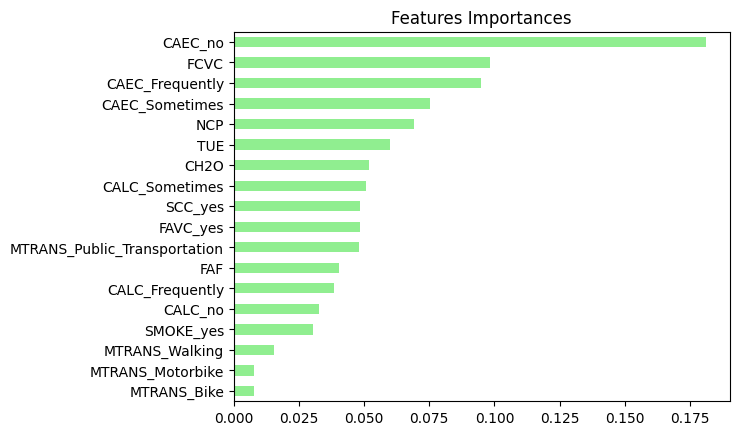

In [ ]:
# feature importances

# create a pd.Series of features importances
importances_xgb = pd.Series(xgb_r.feature_importances_, index=X_train.columns)

# sort the importances
sorted_importances_xgb = importances_xgb.sort_values()

# make a horizontal bar chart
sorted_importances_xgb.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
# Define the parameter distribution for classification
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 8, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 3, 4, 5, 2, 6, 8, 10]
}

# Instantiate the XGBoost Classifier
xgb_c_rand = xgb.XGBClassifier(objective='multi:softmax', random_state=457)

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_c_rand,
    param_distributions=param_dist_xgb,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=457
)

# Fit the random search to the training data
random_search_xgb.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found for XGBoost model (RandomizedSearchCV): ", random_search_xgb.best_params_)

# Print best cross-validation accuracy
print("Best cross-validation accuracy: {:.4f}".format(random_search_xgb.best_score_))

# Evaluate the best model on the test set
best_xgb_c = random_search_xgb.best_estimator_
y_pred_xgb_c = best_xgb_c.predict(X_test)
best_test_acc = accuracy_score(y_test, y_pred_xgb_c)
rmse_test_xgb_c = MSE(y_test, y_pred_xgb_c)**(1/2)

print("Test set accuracy of best XGBoost model (RandomizedSearchCV): {:.4f}".format(best_test_acc))
print('Test set RMSE of the best XGBoost model (RandomizedSearchCV): {:.2f}'.format(rmse_test_xgb_c))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_xgb_c, average='macro')))

Best parameters found for XGBoost model (RandomizedSearchCV):  {'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1}
Best cross-validation accuracy: 0.7373
Test set accuracy of best XGBoost model (RandomizedSearchCV): 0.7461
Test set RMSE of the best XGBoost model (RandomizedSearchCV): 1.72
F1 Score: 0.740


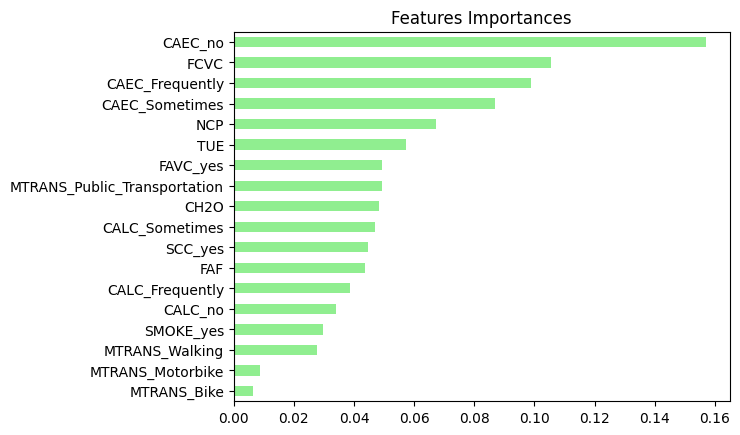

In [ ]:
# feature importances

# create a pd.Series of features importances
importances_xgb_c = pd.Series(best_xgb_c.feature_importances_, index=X_train.columns)

# sort the importances
sorted_importances_xgb_c = importances_xgb_c.sort_values()

# make a horizontal bar chart
sorted_importances_xgb_c.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

### Combined Model

Final Combined Model Accuracy: 0.979


/tmp/ipython-input-3882587593.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


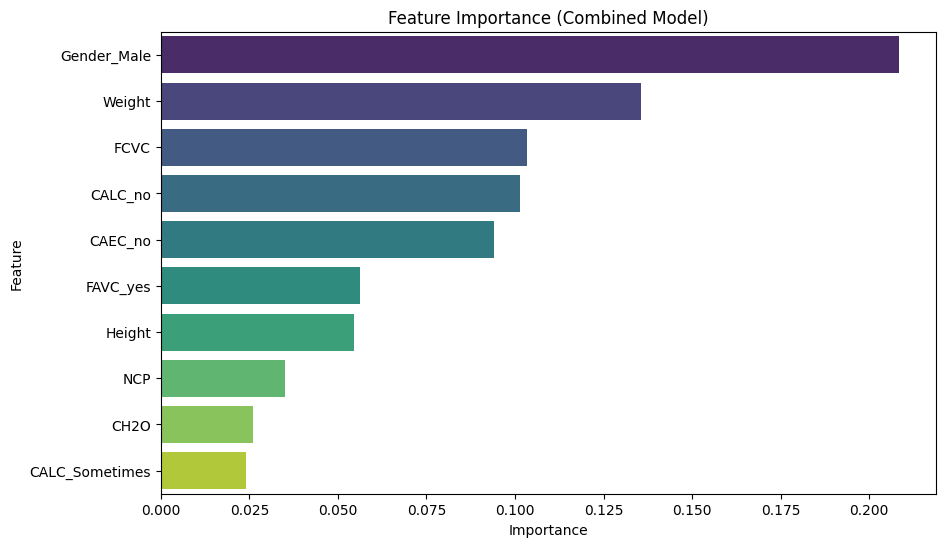

In [ ]:
# 1. Prepare X (Features)
# Drop the target
X_final = df.drop(columns=['NObeyesdad'])
X_final = pd.get_dummies(X_final, drop_first=True)

# 2. Prepare y (Target)
le = LabelEncoder()
y_final = le.fit_transform(df['NObeyesdad'])

# 3. Split Data
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, test_size=0.3, random_state=457)

# 4. Train XGBoost
model_final = xgb.XGBClassifier(eval_metric='mlogloss')
model_final.fit(X_train_f, y_train_f)

# 5. Evaluate
preds_final = model_final.predict(X_test_f)
print("Final Combined Model Accuracy: {:.3f}".format(accuracy_score(y_test_f, preds_final)))

# 6. Feature Importance
importances = model_final.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance (Combined Model)')
plt.show()

In [ ]:
# 1. Random Forest
rf_final = RandomForestClassifier(n_estimators=200, random_state=457)
rf_final.fit(X_train_f, y_train_f)
rf_acc = accuracy_score(y_test_f, rf_final.predict(X_test_f))

# 2. Logistic Regression (The Linear Baseline)
log_final = LogisticRegression(max_iter=5000)
log_final.fit(X_train_f, y_train_f)
log_acc = accuracy_score(y_test_f, log_final.predict(X_test_f))

# 3. Quick Winner Check
print("\n--- FINAL LEADERBOARD ---")
print(f"1. XGBoost:       {accuracy_score(y_test_f, preds_final):.4f}")
print(f"2. Random Forest: {rf_acc:.4f}")
print(f"3. Logistic Reg:  {log_acc:.4f}")


--- FINAL LEADERBOARD ---
1. XGBoost:       0.9795
2. Random Forest: 0.9464
3. Logistic Reg:  0.8691


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Final Accuracy ---
1. XGBoost:       0.9794
2. Random Forest: 0.9558
3. Logistic Reg:  0.8691


